https://www.kaggle.com/datasets/ealaxi/banksim1/data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import Precision
import time

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras_tuner as kt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from keras_tuner import Objective

start_time = time.time()

plt.style.use('ggplot')

In [3]:
import pandas as pd

file_path = '../data/fraud_dataset.csv'

df = pd.read_csv(file_path)
   
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
# Remove quotes from columns

import pandas as pd

# Function to remove single quotes
def remove_quotes(x):
    return x.replace("'", "") if isinstance(x, str) else x

# Specify the columns for which you want to remove single quotes
converters = {'age': remove_quotes, 'gender': remove_quotes, 'category': remove_quotes, 'customer': remove_quotes, 'zipcodeOri': remove_quotes, 'merchant': remove_quotes, 'zipMerchant': remove_quotes}

# Import data with converters
df = pd.read_csv('../data/fraud_dataset.csv', converters=converters)

# Print the first few rows to confirm
print(df.head())


   step     customer age gender zipcodeOri     merchant zipMerchant  \
0     0  C1093826151   4      M      28007   M348934600       28007   
1     0   C352968107   2      M      28007   M348934600       28007   
2     0  C2054744914   4      F      28007  M1823072687       28007   
3     0  C1760612790   3      M      28007   M348934600       28007   
4     0   C757503768   5      M      28007   M348934600       28007   

            category  amount  fraud  
0  es_transportation    4.55      0  
1  es_transportation   39.68      0  
2  es_transportation   26.89      0  
3  es_transportation   17.25      0  
4  es_transportation   35.72      0  


In [5]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [6]:
# Convert columns to categorical type
df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')

# Confirm data types
print(df.dtypes)


step              int64
customer         object
age            category
gender         category
zipcodeOri       object
merchant         object
zipMerchant      object
category       category
amount          float64
fraud             int64
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   step         594643 non-null  int64   
 1   customer     594643 non-null  object  
 2   age          594643 non-null  category
 3   gender       594643 non-null  category
 4   zipcodeOri   594643 non-null  object  
 5   merchant     594643 non-null  object  
 6   zipMerchant  594643 non-null  object  
 7   category     594643 non-null  category
 8   amount       594643 non-null  float64 
 9   fraud        594643 non-null  int64   
dtypes: category(3), float64(1), int64(2), object(4)
memory usage: 33.5+ MB


In [8]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [9]:
df.describe(include=['O'])

,customer,zipcodeOri,merchant,zipMerchant
count,594643,594643,594643,594643
unique,4112,1,50,1
top,C1978250683,28007,M1823072687,28007
freq,265,594643,299693,594643


In [10]:
df.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Dataset overview

We detect the fraudulent transactions from the Banksim dataset. This synthetically generated dataset consists of payments from various customers made in different time periods and with different amounts. The features are as follows:

- Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
- Customer: This feature represents the customer id
- zipCodeOrigin: The zip code of origin/source.
- Merchant: The merchant's id
- zipMerchant: The merchant's zip code
- Age: Categorized age
    - 0: <= 18,
    - 1: 19-25,
    - 2: 26-35,
    - 3: 36-45,
    - 4: 46-55,
    - 5: 56-65,
    - 6: > 65
    - U: Unknown
- Gender: Gender for customer
    - E : Enterprise,
    - F: Female,
    - M: Male,
    - U: Unknown
- Category: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
- Amount: Amount of the purchase
- Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)



# EDA

In [14]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


The two zip code columns are constant for each value and thus provide no additional information.  These will be dropped.

In [16]:
df.drop(columns=['zipcodeOri', 'zipMerchant'], inplace=True)


In [17]:
# Adjust target variable to be categorical
#df['fraud'] = df['fraud'].astype('category') - but can't create barplots if neither variable is numeric

## Univariate Analysis

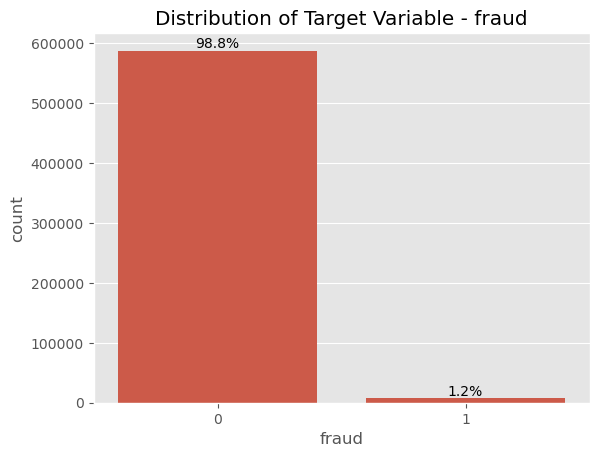

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
countplot = sns.countplot(data=df, x='fraud')

# Get the counts for each category
counts = df['fraud'].value_counts()

# Calculate the total number of data points to compute percentages
total = len(df['fraud'])

# Set the title
plt.title('Distribution of Target Variable - fraud')

# Add percentage labels above the bars
for i, count in enumerate(counts):
    percentage = '{:.1f}%'.format(100 * count / total)  # Calculate percentage
    plt.text(i, count, percentage, ha='center', va='bottom')  # Adjust vertical alignment if necessary

# Show the plot
plt.show()



Only 7,200 of the 594,643 transactions (1.21%) are marked as fraudalent.  This is an inbalanced distribution.  

In [21]:
def show_histplot(dataframe, column):
    ''' Function to print histogram and boxplot for a specific numeric variable '''
    if column in dataframe.select_dtypes(include=['int', 'float']).columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram
        # Define your desired bin width
        bin_width = 1  # Replace with the width you want for each bin

        # Calculate the number of bins
        min_value = df[column].min()
        max_value = df[column].max()
        num_bins = int(((max_value) + 1 - min_value) / bin_width)
        
        sns.histplot(data=dataframe, x=column, ax=axes[0], bins=num_bins, kde=False)
        axes[0].set_title(f'Histogram of {column}')

        # Boxplot
        sns.boxplot(data=dataframe, x=column, ax=axes[1])
        axes[1].set_title(f'Boxplot of {column}')

        # Set a larger title for the entire figure
        fig.suptitle(f'Distributions of {column}', fontsize=16)


    else:
        print(f"The column '{column}' is not numeric or does not exist in the DataFrame.")



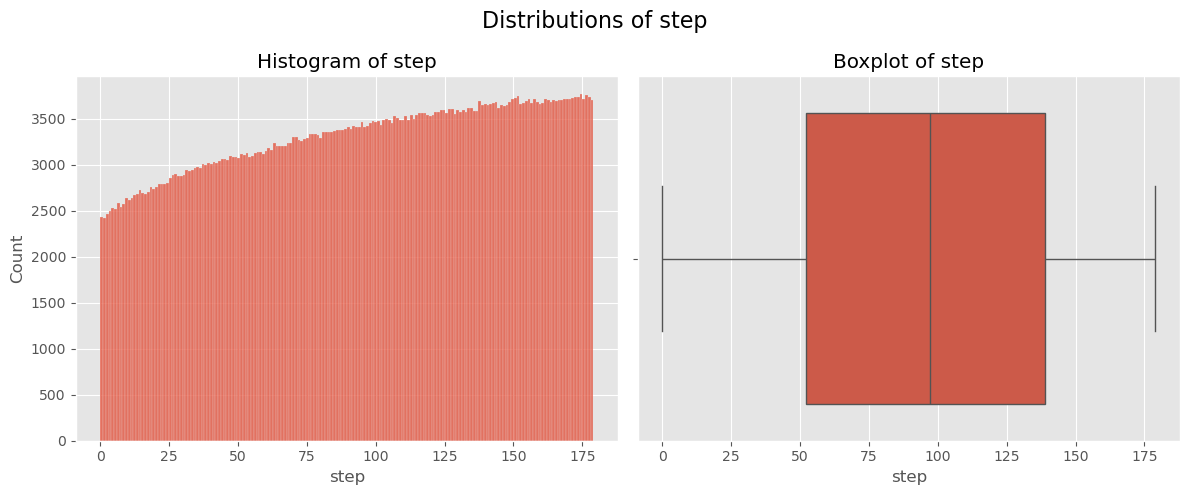

In [22]:
show_histplot(df, 'step')
    
plt.tight_layout()
plt.show()

The number of steps (days) from the start period increases steadily, from 24 to 38, throughout the 6 month period (180 days), which would be as expected.


count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64


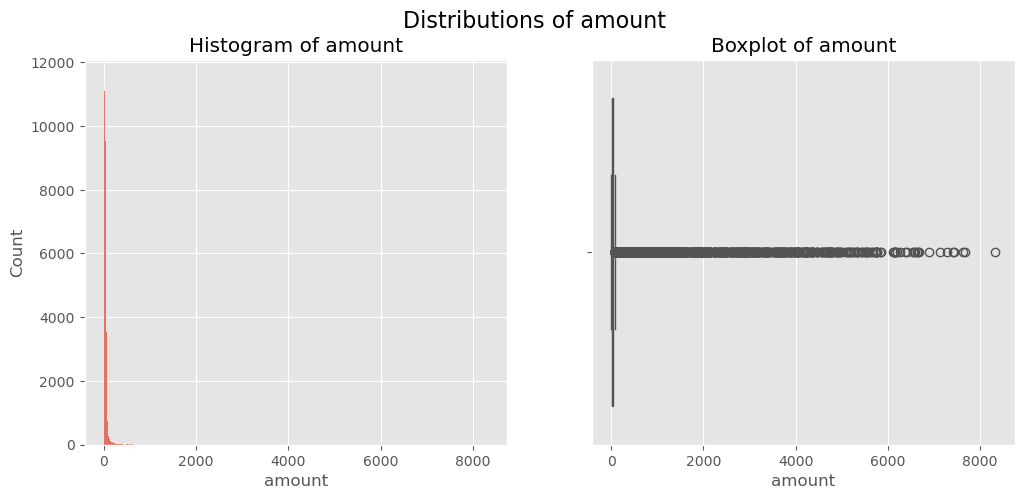

In [24]:
print(df['amount'].describe())

show_histplot(df, 'amount')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_barplot(dataframe, column):
    ''' Function to print a barplot for a specific categorical column '''
    if column in dataframe.select_dtypes(include=['category', 'object']).columns:
        # Calculate the order based on value counts
        order = dataframe[column].value_counts().index
        
        # Create the countplot with the specified order
        sns.countplot(y=column, data=dataframe, order=order)
        
        # Set the title
        plt.title(f'Barplot of {column}')
        
        # Show the plot
        plt.show()
    else:
        print(f"The column '{column}' is not categorical or does not exist in the DataFrame.")

# Example usage
# show_barplot(df, 'your_column_name')


In [28]:
print(df['customer'].describe())

print(df['customer'].value_counts())


count          594643
unique           4112
top       C1978250683
freq              265
Name: customer, dtype: object
customer
C1978250683    265
C1275518867    252
C806399525     237
C515668508     205
C1338396147    195
              ... 
C1345586046      6
C1156745710      6
C1404665203      5
C1743702978      5
C1809646275      5
Name: count, Length: 4112, dtype: int64


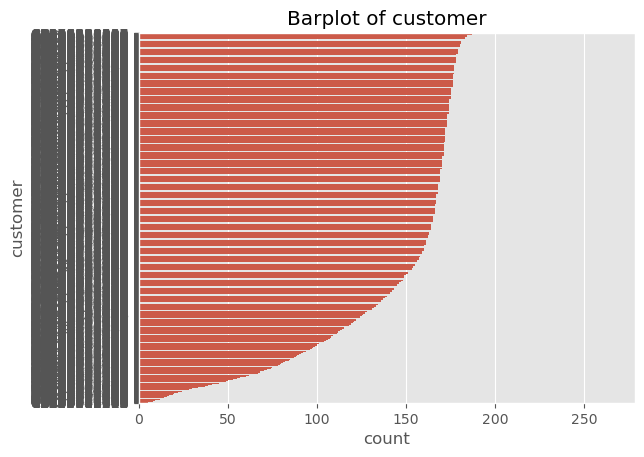

In [29]:
show_barplot(df, 'customer')



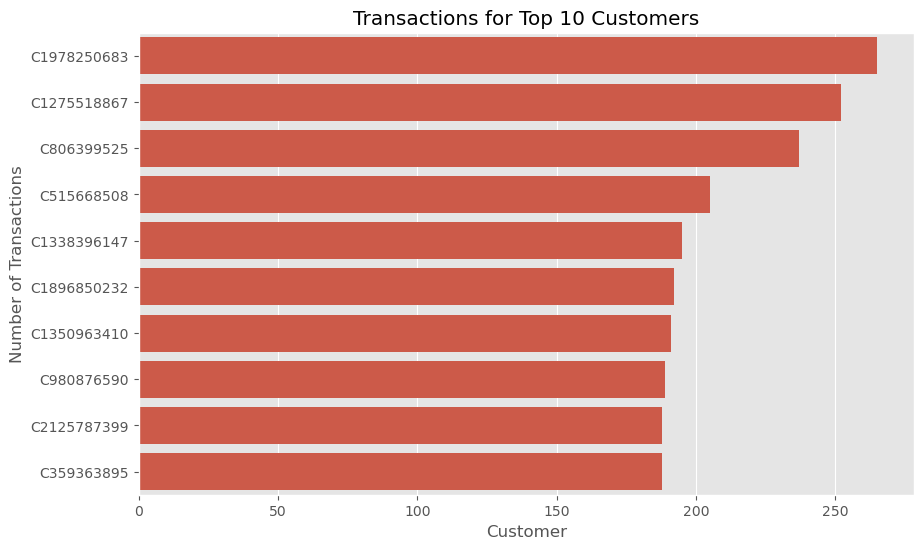

In [30]:
top_10_customers = df['customer'].value_counts().nlargest(10).index

# Filter the DataFrame
cust_df = df[df['customer'].isin(top_10_customers)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=cust_df, y='customer', order=top_10_customers)
plt.xticks(rotation=0)
plt.title('Transactions for Top 10 Customers')
plt.xlabel('Customer')
plt.ylabel('Number of Transactions')
plt.show()


There are 4,112 unique customers

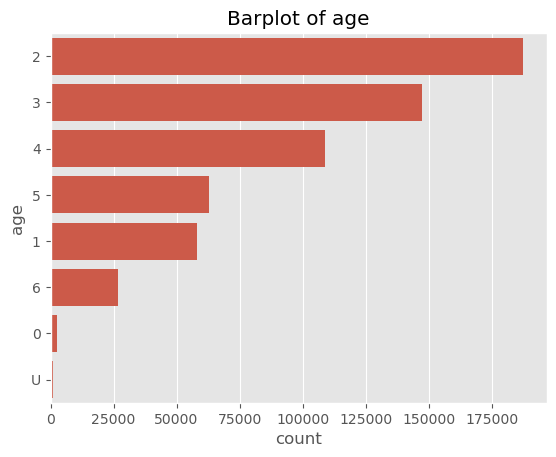

In [32]:
show_barplot(df, 'age')

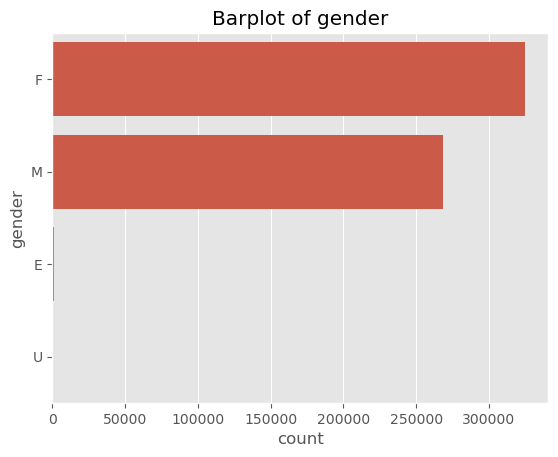

In [33]:
show_barplot(df, 'gender')

Most transactions are female, followed by male, with only a fraction that are enterprise or  unknown.

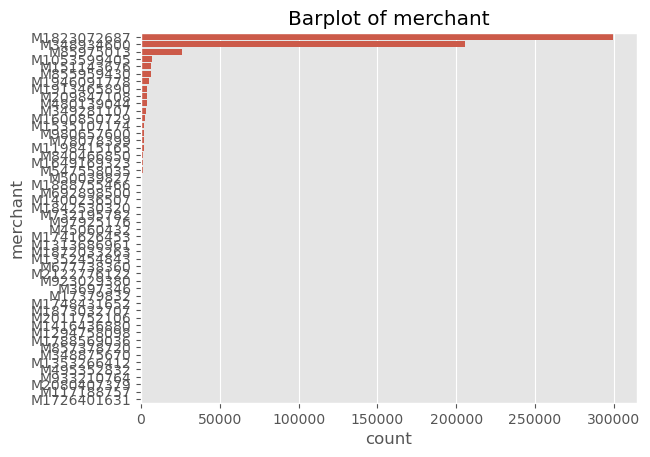

In [35]:
show_barplot(df, 'merchant')

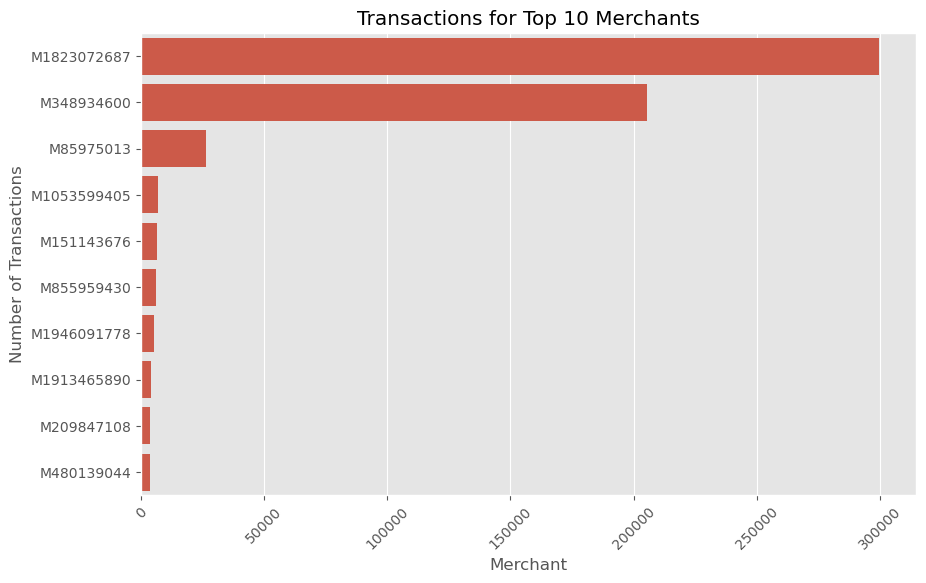

In [36]:
top_10_merchants = df['merchant'].value_counts().nlargest(10).index

# Filter the DataFrame
filtered_df = df[df['merchant'].isin(top_10_merchants)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, y='merchant', order=top_10_merchants)
plt.xticks(rotation=45)
plt.title('Transactions for Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.show()



Most transactions relate to 2 merchants.

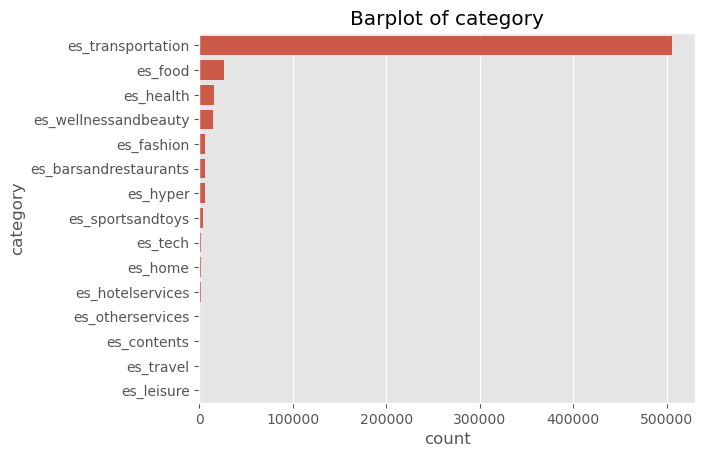

In [38]:
show_barplot(df, 'category')

In [39]:
#sns.barplot(df, x='category', hue='fraud', errorbar=('ci', False))

#plt.show()

# es_transportation is the most common category

Of the different categories, transportation is by far the most common.  

In [41]:
df.dtypes

step           int64
customer      object
age         category
gender      category
merchant      object
category    category
amount       float64
fraud          int64
dtype: object

## Bivariate Analysis

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

def fraud_barplot(dataframe, categorical_column, fraud_column='fraud'):
    ''' 
    Function to plot a barplot of a given categorical column in a dataframe against the 'fraud' column
    '''
    if categorical_column in dataframe.columns and dataframe[categorical_column].dtype in ['object', 'category']:
        # Calculate the count for each category and sort
        sorted_categories = dataframe[categorical_column].value_counts().sort_values(ascending=False).index

        # Create the barplot with sorted categories
        plt.figure(figsize=(10, 6))
        sns.countplot(x=categorical_column, data=dataframe, order=sorted_categories)
        
        # Set the title
        plt.title(f'Distribution of {categorical_column} by {fraud_column}')
        plt.xticks(rotation=45)
        
        # Show the plot
        plt.show()
    else:
        print(f"The column '{categorical_column}' is not categorical or does not exist in the DataFrame.")

# Example usage
# fraud_barplot(df, 'category_column', 'fraud')


There is a moderately correlation between fraud and amount.  Step shows no significant relationship with fraud.

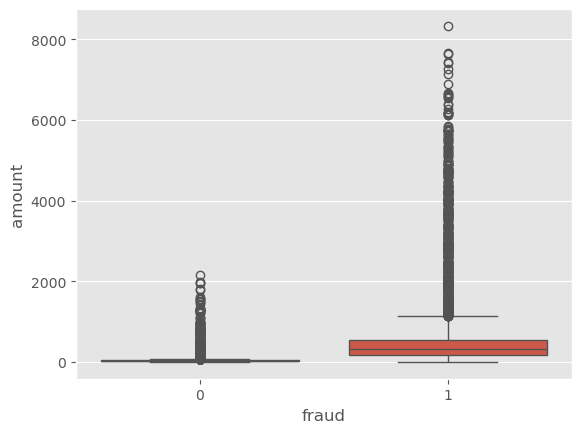

In [45]:
sns.boxplot(x='fraud', y='amount', data=df)
plt.show()

As would be expected, fraud tends to occur at larger amounts.

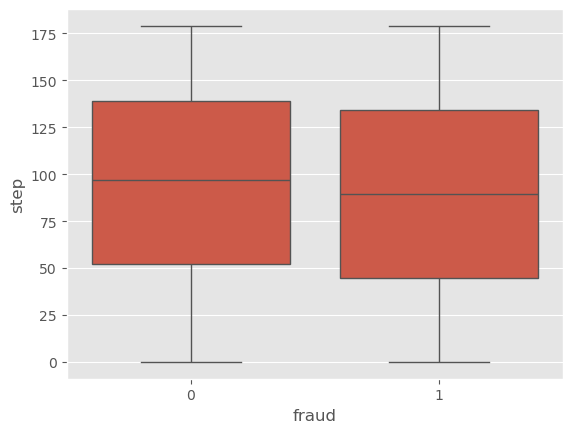

In [47]:
sns.boxplot(x='fraud', y='step', data=df)
plt.show()

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def fraud_barplot(dataframe, categorical_column, fraud_column='fraud'):
    ''' 
    Function to plot a barplot of a given categorical column in a dataframe against the 'fraud' column
    '''
    if categorical_column in dataframe.columns and dataframe[categorical_column].dtype in ['object', 'category']:
        # Create the countplot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=categorical_column, y=fraud_column, data=dataframe)
        
        # Set the title
        plt.title(f'Distribution of {fraud_column} by {categorical_column}')
        plt.xticks(rotation=0)
        
        # Show the plot
        plt.show()
    else:
        print(f"The column '{categorical_column}' is not categorical or does not exist in the DataFrame.")

# Example usage
# plot_categorical_column_vs_fraud(df, 'category_column', 'fraud')



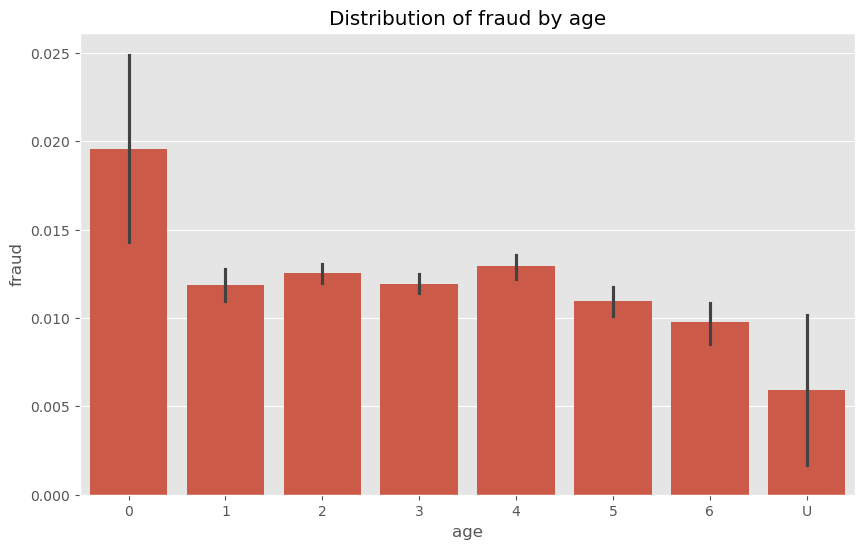

In [49]:
fraud_barplot(df, 'age')


Fraud tends to occur nearly twice as frequently with individuals 18 or under. 

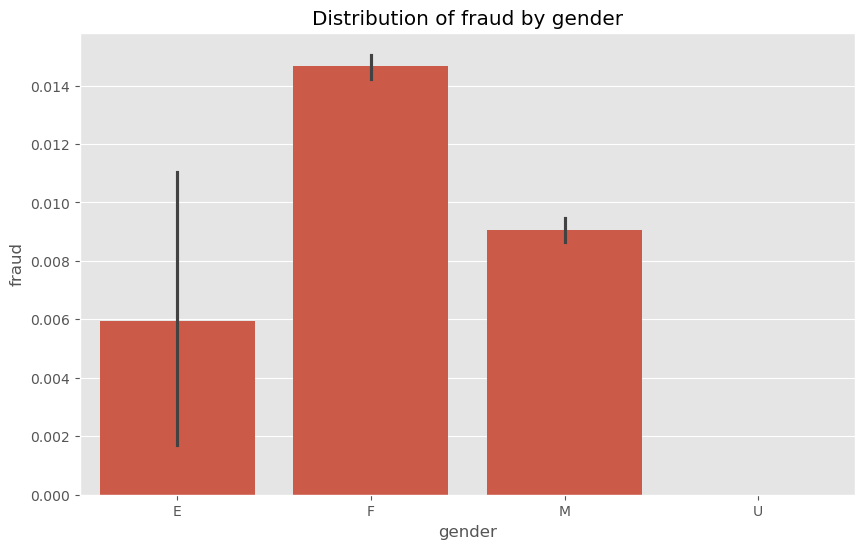

In [51]:
fraud_barplot(df, 'gender')
plt.show()

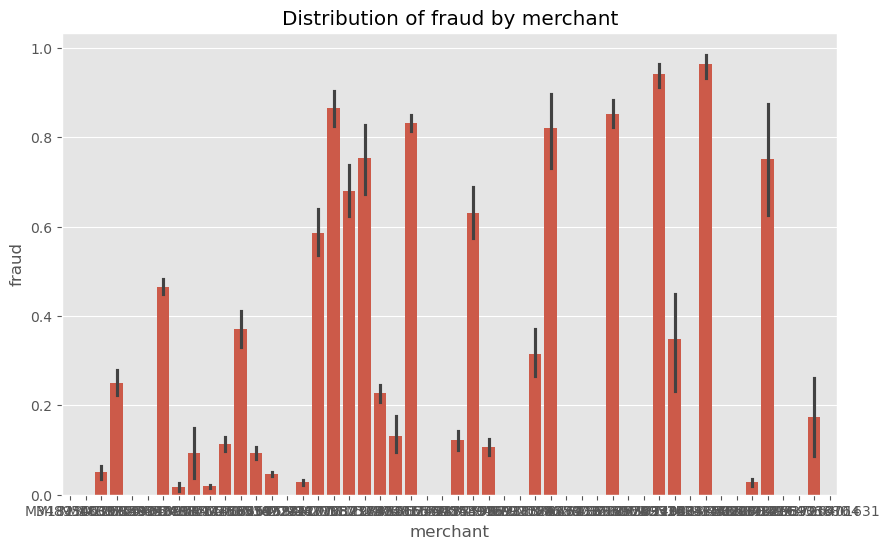

In [52]:
fraud_barplot(df, 'merchant')
plt.show()

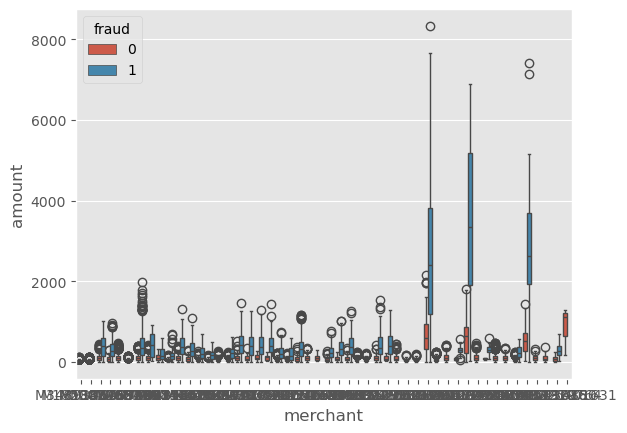

In [53]:
sns.boxplot(data=df, x='merchant', y='amount', hue='fraud')
plt.show()

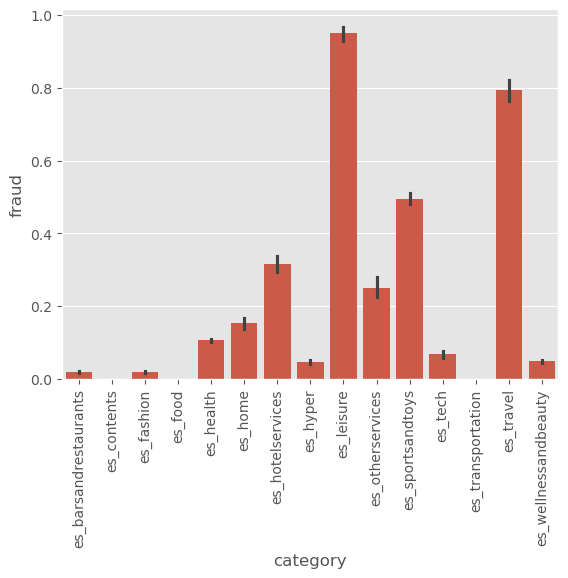

In [54]:
sns.barplot(x='category', y='fraud', data=df)
plt.xticks(rotation=90)
plt.show()

Most fraudalent cases occur with leisure and travel followed by sports and toys. 

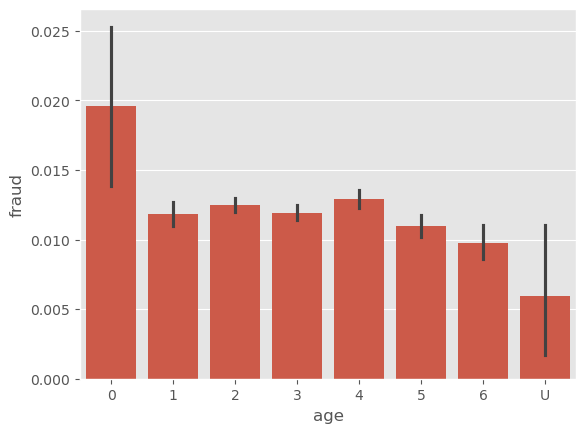

In [56]:
sns.barplot(x='age', y='fraud', data=df)
#plt.xticks(rotation=90)
plt.show()

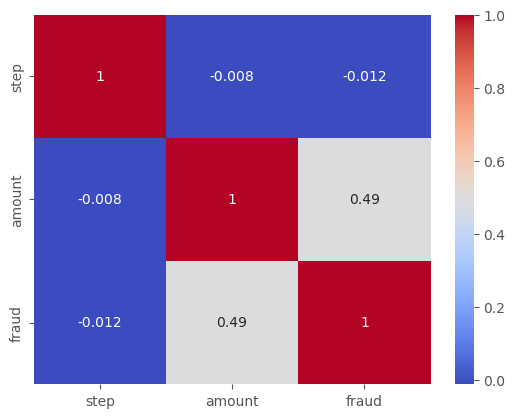

In [57]:
matrix = df.select_dtypes(include=['int', 'float'])
corr = matrix.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# fraud and amount are the most strongly correlation

In [58]:
#sns.barplot(data=df, y='age', x='gender')

# Preprocessing

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   step      594643 non-null  int64   
 1   customer  594643 non-null  object  
 2   age       594643 non-null  category
 3   gender    594643 non-null  category
 4   merchant  594643 non-null  object  
 5   category  594643 non-null  category
 6   amount    594643 non-null  float64 
 7   fraud     594643 non-null  int64   
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 24.4+ MB


In [62]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [63]:
# preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE

# Encoding categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Dropping constant values
selector = VarianceThreshold()  # By default, it removes features with zero variance
df = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])

# Separating features and target variable
X = df.drop('fraud', axis=1)  # Replace 'fraud' with your target column name if different
y = df['fraud']  # Replace 'fraud' with your target column name if different

# Splitting the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Further preprocessing like scaling or applying SMOTE can then be done on these split datasets



In [64]:
df.dtypes

step        float64
customer    float64
age         float64
gender      float64
merchant    float64
category    float64
amount      float64
fraud       float64
dtype: object

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Modeling

## Neural Network Model

In [68]:
import shutil

# Directory where the tuner data is stored
tuner_directory = 'C:/Users/trobb/GitHub/Projects/timothyrobbinscpa/fraud_analysis/src/my_dir/keras_tune_nn'

# Remove the directory to reset the tuner
shutil.rmtree(tuner_directory, ignore_errors=True)


In [69]:
import tensorflow as tf

class F1Score(tf.keras.metrics.Metric):
    """
    Custom metric class to compute the F1 Score, which balances precision and recall.
    The F1 Score is the harmonic mean of precision and recall, providing a better measure of
    the incorrectly classified cases than the Accuracy Metric, especially in cases of imbalanced
    datasets.
    """

    def __init__(self, name='f1_score', **kwargs):
        """
        Initializes the F1Score metric instance.              
        """
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        Updates the state of the metric with the true labels and predicted labels for a batch.
        """
        y_pred = tf.round(y_pred)  # Convert probabilities to binary values (0 or 1)
        y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32 to match y_pred data type
        tp = tf.reduce_sum(y_true * y_pred)  # Calculate true positives
        fp = tf.reduce_sum(y_pred) - tp  # Calculate false positives
        fn = tf.reduce_sum(y_true) - tp  # Calculate false negatives

        self.true_positives.assign_add(tp)  # Increment true positives
        self.false_positives.assign_add(fp)  # Increment false positives
        self.false_negatives.assign_add(fn)  # Increment false negatives

    def result(self):
        """
        Computes and returns the F1 Score using the current state of the metric.        
        """
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_state(self):
        """
        Resets all of the metric state variables to zero.
        This function is called at the start of each epoch.
        """
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)



In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel

class MyHyperModel(HyperModel):
    """
    A custom hypermodel class extending the Keras Tuner HyperModel for building
    a tunable neural network model for binary classification.

    Attributes:
        input_shape (tuple): The shape of the input data expected by the model.
    """

    def __init__(self, input_shape):
        """
        Initializes the MyHyperModel class with the specified input shape.

        Args:
            input_shape (tuple): The shape of the input data (features,).
        """
        self.input_shape = input_shape

    def build(self, hp):
        """
        Builds a neural network model with tunable hyperparameters.

        This function defines a neural network with multiple dense layers and dropout
        layers to prevent overfitting. The number of units in the dense layers and
        the dropout rates are tuned via hyperparameters.

        Args:
            hp (HyperParameters): Hyperparameters object to define ranges for
                                  different parameters to tune.

        Returns:
            model (tf.keras.Model): The compiled neural network model.
        """
        model = Sequential()
        model.add(Dense(units=hp.Int('units', min_value=128, max_value=512, step=32),
                        activation='relu', input_shape=self.input_shape))
        model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=[F1Score()]  # Using 'accuracy' as a simple and common metric for binary classification tasks
        )
        return model


In [71]:
# Tune the neural network model

from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
stop_early = EarlyStopping(monitor='val_f1_score', 
                           patience=10, 
                           mode='max', 
                           verbose=2)

input_shape = (X_train_scaled.shape[1],)
hypermodel = MyHyperModel(input_shape=input_shape)

# Define the objective as maximizing the validation F1 score
objective = Objective('val_f1_score', direction='max')

tuner = RandomSearch(
    hypermodel,
    objective=objective,
    max_trials=1, # chnage back to 20 when running final
    executions_per_trial=1,  # change back to 3 when running final
    directory='my_dir',
    project_name='keras_tune_nn'
)

tuner.search(
    X_train_scaled, 
    y_train_smote, 
    epochs=10, # change back to 100 or 50 when running final
    validation_data=(X_val_scaled, y_val), 
    callbacks=[stop_early]
)

# Get the best model
best_nn = tuner.get_best_models(num_models=1)[0]


Trial 1 Complete [00h 09m 13s]
val_f1_score: 0.6350454688072205

Best val_f1_score So Far: 0.6350454688072205
Total elapsed time: 00h 09m 13s



In [72]:
# Predictions and Evaluation for Neural Network

# Predictions on the test set
nn_test_predictions = (best_nn.predict(X_test_scaled) > 0.5).astype("int32")

nn_prob_predictions = best_nn.predict(X_test_scaled).ravel()  # Flatten array


3717/3717 [==============================] - 3s 925us/step


In [73]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_f1_score',  # or 'val_f1_score' if you have a custom F1 metric
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restores model weights from the epoch with the best value of the monitored quantity
    verbose=2
)


In [2]:
# Retrieve the history from the best model's training

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and fit it to the data
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    X_train_scaled, 
    y_train_smote, 
    epochs=5, #change back to 100 or 50 when running final
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopper])


NameError: name 'tuner' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation F1 score
# Make sure that 'f1_score' and 'val_f1_score' are the correct keys in the history object
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Train F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Model F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.show()




## Random Forest Model

In [ ]:
# Setup for Random Forest and RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


class_weight_options = [
    'balanced',
    'balanced_subsample'
]


# Setting up the parameter grid for Randomized Search
param_dist = {
    "n_estimators": randint(100, 300),  # Reduced upper limit to 300
    "max_depth": randint(3, 20),        # Set a maximum depth limit of 20
    "max_features": randint(1, 8),      # Reduced upper limit to 8
    "min_samples_split": randint(4, 12),# Increased minimum to 4, increased maximum to 12
    "min_samples_leaf": randint(2, 6),  # Increased minimum to 2, reduced maximum to 6
    "bootstrap": [True, False],
    "class_weight": class_weight_options
}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Setup RandomizedSearchCV with the defined Random Forest model
random_search = RandomizedSearchCV(rf, 
                                   param_distributions=param_dist, 
                                   n_iter=2,  # change back to 20 iter and 5 fold cv when run final
                                   cv=3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1) 


# Execute the hyperparameter search
random_search.fit(X_train_scaled, y_train_smote)


In [ ]:
# Get the best estimator
best_rf = random_search.best_estimator_

In [ ]:
# Validate the model

# Validate the model on the validation set
val_predictions = best_rf.predict(X_val_scaled)

# Print validation accuracy and classification report
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("\nValidation Classification Report:")
print(classification_report(y_val, val_predictions))


In [ ]:
# Predictions on the test set

test_predictions = best_rf.predict(X_test_scaled)

# Print test accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("\nTest Classification Report:")
print(classification_report(y_test, test_predictions))


In [ ]:
# Assuming 'random_search' is the completed RandomizedSearchCV object

# To get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:")
print(best_params)

# Assuming 'random_search' is your completed RandomizedSearchCV object for the RandomForestClassifier
best_score = random_search.best_score_
print("Best score for Random Forest from RandomizedSearchCV:", best_score)


rf_prob_predictions = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
threshold = 0.5
rf_binary_predictions = (rf_prob_predictions > threshold).astype(int)


## Model Comparison

### Metrics

In [ ]:
# Evaluate and compare model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_binary_predictions)
rf_precision = precision_score(y_test, rf_binary_predictions)
rf_recall = recall_score(y_test, rf_binary_predictions)
rf_f1 = f1_score(y_test, rf_binary_predictions)

# Calculate metrics for Neural Network
nn_accuracy = accuracy_score(y_test, nn_test_predictions)
nn_precision = precision_score(y_test, nn_test_predictions)
nn_recall = recall_score(y_test, nn_test_predictions)
nn_f1 = f1_score(y_test, nn_test_predictions)

# Define the metrics dictionary
metrics = {
    'Accuracy': [rf_accuracy, nn_accuracy],
    'Precision': [rf_precision, nn_precision],
    'Recall': [rf_recall, nn_recall],
    'F1 Score': [rf_f1, nn_f1]
}

# Print and compare the metrics
print("Random Forest Model Metrics:")
print(f"Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")

print("\nNeural Network Model Metrics:")
print(f"Accuracy: {nn_accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, F1 Score: {nn_f1}")



In [ ]:
from sklearn.metrics import classification_report

# Assuming we have the actual labels y_test and the predictions rf_test_predictions and nn_test_predictions

# Generate classification reports
rf_classification_report = classification_report(y_test, rf_binary_predictions, target_names=['Not Fraud', 'Fraud'])
nn_classification_report = classification_report(y_test, nn_test_predictions, target_names=['Not Fraud', 'Fraud'])

print("Random Forest Classification Report:")
print(rf_classification_report)
print("\nNeural Network Classification Report:")
print(nn_classification_report)



The confusion matrices for the two models indicate the following:

- The Random Forest has a lower False Negative rate, indicating it is better at detecting fraud (higher recall). However, it has a higher False Positive rate, which would result in more legitimate transactions being flagged as fraud.
- The Neural Network has a lower False Positive rate, leading to fewer legitimate transactions being incorrectly flagged (higher precision). But it has a higher False Negative rate, meaning it misses more actual fraud cases.


In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
labels = list(metrics.keys())
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
nn_metrics = [nn_accuracy, nn_precision, nn_recall, nn_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_metrics, width, label='Random Forest')
rects2 = ax.bar(x + width/2, nn_metrics, width, label='Neural Network')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Accuracy:

Both models perform similarly, with very high accuracy scores: 1.0 for the Random Forest and 0.99 for the Neural Network.
Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined.
Precision:

The Random Forest model has a recall of 0.77, whereas the Neural Network has a recall of 0.84.
Precision measures the proportion of true positive identifications, meaning it is the number of true positives divided by the number of true positives plus the number of false positives. A higher precision score indicates a lower false positive rate.
Recall:

The Random Forest model has a precision of 0.9, which is significantly higher than the Neural Network's precision of 0.48.
Recall (also known as sensitivity) measures the proportion of actual positives that were identified correctly. It is the number of true positives divided by the number of true positives plus the number of false negatives. A higher recall score indicates that the model is better at capturing the positive class.
F1 Score:

The Random Forest model has an F1 score of 0.8, which is higher than the Neural Network's F1 score of 0.62.
The F1 Score is the harmonic mean of Precision and Recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a model has a good balance between precision and recall.
Overall Interpretation:
The Random Forest model appears to have better recall and F1 scores, indicating it is better at correctly identifying the positive class and balancing precision and recall.
The Neural Network has a slightly better precision but a significantly lower recall, suggesting it is more conservative in predicting the positive class but misses a substantial number of positive cases.
In terms of accuracy, both models perform exceptionally well, but this metric alone can be misleading, especially if the class distribution is imbalanced. It's important to consider the context of the problem: if false positives and false negatives have different costs, precision and recall might be more important than accuracy.
When deciding between the two models, you would consider the specific requirements of your application. If minimizing false negatives is crucial (thus requiring a high recall), the Random Forest seems preferable. If you want to ensure that the positive predictions are correct (requiring high precision), then the Neural Network might be the better choice, albeit only slightly.

Lastly, the F1 score suggests that the Random Forest has a better overall balance of precision and recall, making it a good choice if you value both metrics equally.










### PR ROC Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall points for Random Forest
rf_precision_points, rf_recall_points, _ = precision_recall_curve(y_test, rf_prob_predictions)
rf_pr_auc = auc(rf_recall_points, rf_precision_points)

# Calculate precision-recall points for Neural Network
nn_precision_points, nn_recall_points, _ = precision_recall_curve(y_test, nn_prob_predictions)
nn_pr_auc = auc(nn_recall_points, nn_precision_points)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(rf_recall_points, rf_precision_points, label=f'Random Forest (PR AUC = {rf_pr_auc:.4f})')
plt.plot(nn_recall_points, nn_precision_points, label=f'Neural Network (PR AUC = {nn_pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



a Precision-Recall (PR) Curve, which is used to evaluate the performance of a classification model at different probability thresholds. The PR curve plots the Precision (y-axis) against the Recall (x-axis).

Here’s an interpretation of the plot:

Precision-Recall Trade-off: The curves show the trade-off between precision and recall for the Random Forest and Neural Network models. As the recall increases, precision tends to decrease, which is typical behavior for classifiers.

Random Forest Model (Red Curve):

The Random Forest model has a Precision-Recall Area Under the Curve (PR AUC) of 0.8960.
It starts with high precision but experiences a gradual decline as recall increases.
The relatively high PR AUC value suggests that the Random Forest model has a good balance between precision and recall overall.
Neural Network Model (Blue Curve):

The Neural Network model has a PR AUC of 0.8486, which is slightly lower than the Random Forest model.
This curve also demonstrates the trade-off, with precision decreasing as recall increases.
While the Neural Network performs well, it is slightly outperformed by the Random Forest model in terms of the area under the PR curve.
Comparison:

Both models perform relatively well, with PR AUC scores close to 1, indicating strong performance.
However, the Random Forest model has a higher PR AUC, suggesting it is better at distinguishing between the positive and negative classes across different thresholds.
The curves are close to each other, which means the performance of both models is somewhat similar, but the Random Forest has a slight edge.
PR AUC Scores:

The PR AUC scores are included in the legend. Higher PR AUC scores are generally better, indicating a model that maintains high precision across different levels of recall.
These scores provide a single measure of performance across all classification thresholds, unlike the curves that show performance at each threshold.
In conclusion, based on this PR curve, the Random Forest model is slightly superior to the Neural Network for the task at hand, likely due to its ability to maintain higher precision at similar levels of recall. When choosing between models, if precision is more critical for the application (i.e., minimizing false positives), the Random Forest might be the preferred model. If you need to prioritize recall (i.e., minimizing false negatives), the performance difference between the models is less pronounced.





### Feature Importances

In [1]:
# Get Feature importnaces for the random forest model

# Assuming rf_model is your trained Random Forest model
rf_feature_importances = best_rf.feature_importances_


NameError: name 'best_rf' is not defined

In [ ]:
# Get Weights from the First Layer of the Neural Network Model

# Assuming nn_model is your trained Neural Network model
first_layer_weights = best_nn.layers[0].get_weights()[0]
nn_feature_importances = np.mean(np.abs(first_layer_weights), axis=1)


In [ ]:
# Plot feature importances

import matplotlib.pyplot as plt

# Assuming you have a list of feature names
feature_names = X_train.columns

# Normalize feature importances for comparison
rf_feature_importances_normalized = rf_feature_importances / rf_feature_importances.max()
nn_feature_importances_normalized = nn_feature_importances / nn_feature_importances.max()

# Set up the bar widths and positions
ind = np.arange(len(rf_feature_importances))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bar plots
rf_bars = ax.bar(ind - width/2, rf_feature_importances_normalized, width, label='Random Forest')
nn_bars = ax.bar(ind + width/2, nn_feature_importances_normalized, width, label='Neural Network')

# Add labels, title, and legend
ax.set_ylabel('Normalized Importance')
ax.set_title('Feature Importances by Model')
ax.set_xticks(ind)
ax.set_xticklabels(feature_names, rotation='vertical')
ax.legend()

plt.show()


Random Forest Model (Red Bars):

The feature amount has the highest importance, indicating it is the most influential feature for the Random Forest model when making predictions.
The category feature also appears to be quite significant, followed by merchant, suggesting these features play a strong role in the model's decisions.
Customer has a moderate level of importance.
Features such as step, age, and gender have very low importance in the Random Forest model, implying they have minimal impact on the model's predictions.
Neural Network Model (Blue Bars):

Similar to the Random Forest model, the amount feature is highly important in the Neural Network model but to a slightly lesser degree.
The category and merchant features have a noticeable level of importance, but merchant is less important compared to the Random Forest model.
The customer feature is more important in the Neural Network model than in the Random Forest model.
Similar to the Random Forest, step, age, and gender have lower importance, with gender having the least importance among all features.
Comparative Insights:
Both models agree on the high importance of the amount feature, which likely has a strong correlation with the target variable.
The category feature is also considered important by both models, which might suggest that certain categories have a higher likelihood of being associated with the target variable.
There is a notable difference in how the models weigh the importance of customer and merchant. The Neural Network gives more importance to customer than the Random Forest model, which might be due to differences in how these models capture and use information from the data.
The step, age, and gender features are consistently given low importance by both models, indicating these features may not be very useful in predicting the outcome.
Differences in feature importance between the two models can arise due to the intrinsic differences in how Random Forests and Neural Networks learn from the data. Random Forests use decision trees that make splits based on reducing entropy or Gini impurity, while Neural Networks learn a set of weights through backpropagation, which can capture more complex and non-linear relationships.

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the program is {total_time/(60 * 60)} hours")
